# Homework 6A

This is part of Homework 6.  Due by 11:00pm on March 10, 2023

For the complete assignment and submission instructions, see:
http://faculty.washington.edu/rjl/classes/am574w2023/homework6.html

Ideally you will do this part of the homework by modifying this Jupyter notebook `$AM574/homeworks/hw6/hw6A.ipynb` to fill in the solutions, with plots to accompany your results.  If necessary you can scan some handwritten things instead.

The notebook `$AM574/homeworks/hw5/hw5solutions.ipynb` may be helpful, particularly if you had any problems with hw5.

In [1]:
%matplotlib inline

In [2]:
from pylab import *
from scipy.optimize import fsolve

## Isothermal p-system

Many of the problems below concern the same nonlinear hyperbolic system 
$q_t + f(q)_x=0$ given by the p-system arising from Lagrangian gas dynamics (2.108)
in the case of isothermal flow (as in Problem 2.8(b) from hw1 and hw5):

$$
\begin{split}
v_t - u_x &= 0,\\
u_t + (a^2/v)_x &=0.
\end{split}
$$

Write out formulas for general values of $a$ but use $a=2$ for the specific examples.

In [3]:
def plot_phase_plane():
    """
    Set up a plot with appropriate limits and labels
    """
    figure(figsize=(6,6))
    plot([0,6],[0,0],'k-',linewidth=0.7)  # v-axis
    axis([0,6,-3,3])
    grid(True)
    xlabel('v = specific volume')
    ylabel('u = velocity');

**Question 1.** 

In hw5, you worked out relations for the Hugoniot loci and integral curves and found solutions consisting of 2 rarefaction waves or 2 shocks (possibly violating the entropy condition).  These can be computed analytically.  The notebook `$AM574/homeworks/hw5/hw5solutions.ipynb` also illustrates how to use [scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)
to solve for the intersection point numerically.

Write a function `Rsolver(vl,ul,vr,ur,a)` that takes a left and right state as input and returns `vm,um`, the correct middle state in the vanishing viscosity Riemann solution.  In this case each wave can be either a shock or rarefaction depending on the data provided.

Do this by first defining function `phi_left(v,vl,ul,a)` that returns `u` as a function of `v` that is either along the integral curve or the Hugoniot locust through `(vl,ul)`, depending on whether the state `(vm,um)` should be connected to `(vl,ul)` by a rarefaction wave or shock, respectively.  Similarly define `phi_right(v,vr,ur,a)`.  These functions are analogous to those defined in Section 13.10 for the shallow water equations, and can be defined using the functions `uint1, uint2, uhug1, uhug2` defined in Homework 5.

Then apply `fsolve` to find the intersection of `phi_left` with `phi_right`.  Note that `fsolve` can take an initial guess for the solution and if this is not reasonably close to be correct then the solver may not converge.  So as an initial guess, use the intersection of the appropriate integral curves passing through $q_\ell$ and $q_r$.

Test your function by applying it to:

(a) the case from Homework 5, $q_\ell = (1,-2)$ and $q_r = (1,2)$, where the correct solution has two rarefaction waves

(b) $q_\ell = (1,1)$ and $q_r = (2.5,-2)$, where the correct solution has two shock waves

(c) $q_\ell = (0.5, -1)$ and $q_r = (2, 1)$

(d) $q_\ell = (2.5,0)$ and $q_r = (0.2,2)$

In each case print out the state `(vm,um)` and produce a phase plane plot like what is shown below.  The solution to (b) should look like this:

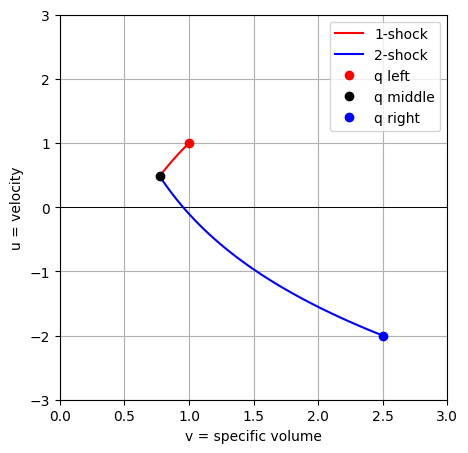

In [4]:
from IPython.display import Image
Image('isothermal3.png', width=400)

Here is a the function I used to make this plot, missing a couple critical `CONDITIONS` for you to think about and fill in, along with providing the function `Rsolver`:

**Solution:**

In [5]:
uint1 = lambda v,vstar,ustar,a: ustar + a*log(v/vstar)
uint2 = lambda v,vstar,ustar,a: ustar - a*log(v/vstar)
uhug1 = lambda v,vstar,ustar,a: ustar + a*(v-vstar)/sqrt(v*vstar)
uhug2 = lambda v,vstar,ustar,a: ustar - a*(v-vstar)/sqrt(v*vstar)

s1 = lambda v,vstar,ustar,a: -a/sqrt(v*vstar)
s2 = lambda v,vstar,ustar,a:  a/sqrt(v*vstar)

In [6]:
def phi_left(v,vl,ul,a):
    if all(v>=vl):
        u = uint1(v,vl,ul,a)
    else:
        u = uhug1(v,vl,ul,a) 
    return u

In [7]:
def phi_right(v,vr,ur,a):
    if all(v>=vr):
        u = uint2(v,vr,ur,a)
    else:
        u = uhug2(v,vr,ur,a) 
    return u

In [8]:
def Rsolver(vl,ul,vr,ur,a):
    ginit = lambda v: uint1(v,vl,ul,a)-uint2(v,vr,ur,a)
    initguess = fsolve(ginit,(vl+vr)/2)
    
    g = lambda v: phi_left(v,vl,ul,a)-phi_right(v,vr,ur,a)
    
    vm = fsolve(g,initguess)
    um = phi_left(vm,vl,ul,a)
    
    return vm, um

In [9]:
def plot_Rsoln_sample(vl,ul,vr,ur,a):
    
    vm,um = Rsolver(vl,ul,vr,ur,a)
    

    plot_phase_plane()
    
    v = linspace(vl,vm,100)
    if (vm>=vl):
        label1 = '1-rarefaction'
    else:
        label1 = '1-shock'
    plot(v, phi_left(v,vl,ul,a),'r-',label=label1,zorder = 3)
    
    v = linspace(vr,vm,100)
    if (vm>=vr):
        label2 = '2-rarefaction'
    else:
        label2 = '2-shock'
    plot(v, phi_right(v,vr,ur,a),'b-',label=label2,zorder = 3)
    
    plot([vl],[ul],'ro',label='q left')
    plot([vm],[um],'ko',label='q middle',zorder = 4)
    plot([vr],[ur],'bo',label='q right')
    text(.1,2.5, '$v_m$ = %.5f, $u_m$ = %.5f' % (vm,um), backgroundcolor='w')
    legend()
    xlim(0,3);
    title('$q_l=$(%.1f, %.1f) and $q_r=$(%.1f, %.1f)'% (vl,ul,vr,ur))

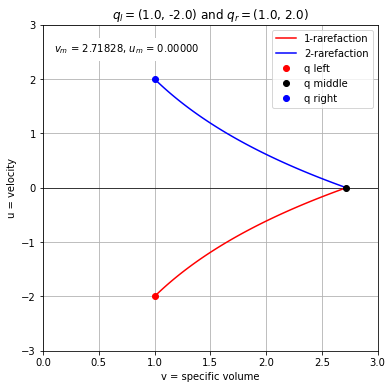

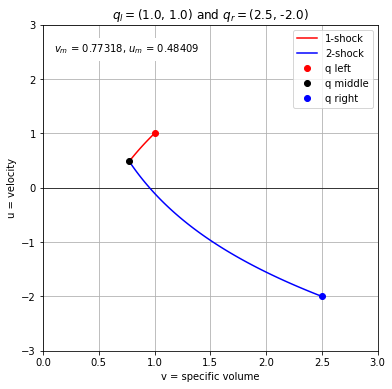

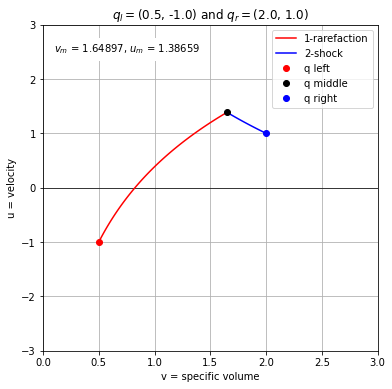

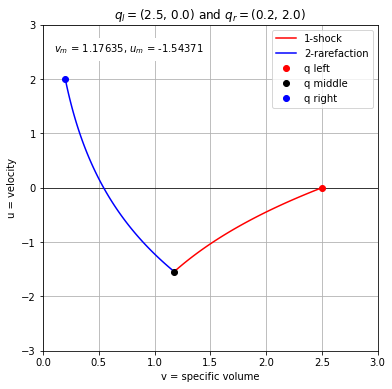

In [10]:
a = 2
qls = [[1,-2],[1,1],[.5,-1],[2.5,0]]
qrs = [[1,2],[2.5,-2],[2,1],[.2,2]]

for index1 in range(len(qls)):
    ql = qls[index1]
    qr = qrs[index1]
    plot_Rsoln_sample(ql[0],ql[1],qr[0],qr[1],a)
    show()

**Question 2.** 

Following Section 13.8.2 and using the integral curves determined in hw5, what are the Riemann invariants for this system?

**Solution 2:**

Remind yourself of the integral curves:
$$u^1(v)= \ln(|v|^a)-\ln(|v_*|^a)+u_*\text{ and }u^2(v)= -\ln(|v|^a)+\ln(|v_*|^a)+u_*.$$
Restricting ourselves to positive $v$ and $v_*$, we can rewrite the $1$-integral curve as
$$ u-a\ln(v)=u_*-a\ln(v_*).$$
Since $v$ and $v_*$ are random and therefore $u$ and $u_*$ are also random, we have that the function
$$w^1:\mathbb{R}^2\to\mathbb{R}:(u,v)\mapsto u-a\ln(v),$$
is constant. Therefore, we have that $w^1$ is $1$-Riemann invariant for this system, meaning that the values of $w^1(q)$ are constant for $q$ on the $1$-integral curve.

Looking now at the $2$-integral curve, we can rewrite it as
$$ u+a\ln(v)=u_*+a\ln(v_*).$$
Therefore, function 
$$w^2:\mathbb{R}^2\to\mathbb{R}:(u,v)\mapsto u+a\ln(v),$$
is $2$-Riemann invariant for this system, meaning that the values of $w^2(q)$ are constant for $q$ on the $2$-integral curve.


**Question 3.** 

Compute the structure $\tilde q(x/t)$ of a centered rarefaction wave in the 1-wave family for this system (following Section 13.8.5) connecting two states $q_\ell$ and $q_r$ on the same integral curve.  For what states is this a valid solution?

**Solution 3:**

From taking a simple wave $q(x,t)=\tilde{q}(\xi(x,t))$ and filing it in, gives us
\begin{align*}
\xi_t\tilde{q}'(\xi)+\xi_xf(\tilde{q}(\xi))\tilde{q}'(\xi)&=\xi_t\tilde{q}'(\xi)+\xi_x\lambda^p(\tilde{q}(\xi))\tilde{q}'(\xi)\\
&=(\xi_t+\lambda^p(\tilde{q}(\xi))\xi_x)\tilde{q}'(\xi)=0,
\end{align*}
therefore, with $\xi=x/t$, we eventually get
\begin{align}
\lambda^p(\tilde{q})&=\frac{x}{t}.\label{raref}\tag{1}
\end{align}
We want to make a centered rarefaction wave:
$$ 
q(x,t)=\begin{cases}
q_l & \text{if }x/t\leq\xi_1,\\
\tilde{q} & \text{if }\xi_1\leq x/t\leq\xi_2,\\
q_r & \text{if }\xi_2\leq x/t,
\end{cases}
$$
where, because of $\eqref{raref}$, $\xi_1=\lambda^p(q_l)$ and $\xi_2=\lambda^p(q_r)$. Note here that we then must have that $\xi_1\leq\xi_2$ and thus $\lambda^p(q_l)\leq\lambda^p(q_r)$. \bf{In this case $p=1$ as we're look in the $1$-wave family.}

We now want to find the rarefaction wave on a single integral curve has to have that $\tilde{q}'(\xi)$ is a scalar multiple of the eigenvector $r^p(\xi)$. Therefore,
$$\tilde{q}'(\xi)=\alpha(\xi)r^p(\tilde{q}(\xi)). $$
We now derive $\eqref{raref}$ over $\xi$ to get
$$1=\nabla \lambda^p(\tilde{q}(\xi))\cdot\tilde{q}'(\xi)\Rightarrow 1=\alpha(\xi)\nabla \lambda^p(\tilde{q}(\xi))\cdot r^p(\xi)\Rightarrow  \alpha(\xi) = \cfrac{1}{\nabla \lambda^p(\tilde{q}(\xi))\cdot r^p(\xi)}.$$
As we now know what scalar $\tilde{q}'(\xi)$ is a multiple of the eigenvector, we can fill it in again:
$$\tilde{q}'(\xi)=\cfrac{r^p(\tilde{q}(\xi))}{\nabla \lambda^p(\tilde{q}(\xi))\cdot r^p(\xi)},$$
with conditions that this forms a continouos solutions:
\begin{eqnarray}
\xi_1 = \lambda^p(q_l) ~~~~ \tilde{q}(\xi_1)=q_l,\label{eqn1}\tag{2}\\
\xi_2 = \lambda^p(q_r) ~~~~ \tilde{q}(\xi_2)=q_r.\label{eqn2}\tag{3} 
\end{eqnarray}
Since we have that $p=1$, we calculate the dotproduct:
\begin{align*}
\nabla \lambda^1\cdot r^1 &= \begin{bmatrix}\frac{a}{\tilde{v}^2}\\0 \end{bmatrix}\cdot \begin{bmatrix}1\\\frac{a}{\tilde{v}} \end{bmatrix}\\
&=\frac{a}{\tilde{v}^2}
\end{align*}
We now calculate this ode:
$$\begin{bmatrix}\tilde{v}\\\tilde{u}\end{bmatrix}_\xi= \begin{bmatrix}\frac{\tilde{v^2}}{a}\\\tilde{v}\end{bmatrix}.$$
We can immediately see that 
$$\tilde{v}=-\frac{a}{\xi+A}.$$
With this constant chosen so that, $\eqref{eqn1}$ and $\eqref{eqn2}$ are fulfilled: $\tilde{v}=v_l$ at $\xi_1=-\frac{a}{v_l}$ and $\tilde{v}=v_r$ at $\xi_2=-\frac{a}{v_r}$. This if they both lie on the same integral curve $r^1$, which is a given for this solution to be physically correct. Thus,
$$v_l=\tilde{v}(\xi_1)=-\frac{a}{-\frac{a}{v_l}+A}\Rightarrow A = 0,$$
and,
$$v_r=\tilde{v}(\xi_2)=-\frac{a}{-\frac{a}{v_r}+A}\Rightarrow A = 0.$$
Therefore, 
$$v(x,t)=-\frac{at}{x} \text{ for } -\frac{a}{v_l}\leq x/t\leq-\frac{a}{v_r}.$$
It's also pretty easy to find $\tilde{u}$ now, as $\tilde{u}'=\tilde{v}$, therefore
$$\tilde{u}'=-\frac{a}{\xi}\Rightarrow \tilde{u}=-a\ln(|\xi|)+A.$$
Note that here we also want $\eqref{eqn1}$ and $\eqref{eqn2}$ to hold, thus $\tilde{u}=u_l$ at $\xi_1=-\frac{a}{v_l}$ and $\tilde{u}=u_r$ at $\xi_2=-\frac{a}{v_r}$. Thus:
$$u_l=\tilde{u}(\xi_1)=-a\ln\left(\frac{a}{v_l}\right)+A\Rightarrow A = u_l-a\ln(v_l)+a\ln(a),$$
and,
$$u_r=\tilde{u}(\xi_2)=-a\ln\left(\frac{a}{v_r}\right)+A\Rightarrow A = u_r-a\ln(v_r)+a\ln(a).$$
Note that $u_l-a\ln(v_l)=u_r-a\ln(v_r)$ as the function $w^1(q)=u-a\ln(v)$ (from the last exercise) is 1-Rieman invariant! Once again, assuming that $q_l$ and $q_r$ are on the 1-integral curve. Therefore this $A$ is one single value. We could have also just used the Riemand invariance in order to calculate $\tilde{u}$, but this was easy enough.

In conclusion: a centered rarefaction wave in the 1-wave family for this system connecting two states $q_\ell$ and $q_r$ on the same integral curve is given by
$$q(x,t)=\begin{cases}
q_l & \text{if }x/t\leq-\frac{a}{v_l},\\
(-\frac{at}{x},a\ln(\frac{a}{v_l}|t/x|)+u_l) & \text{if }-\frac{a}{v_l}\leq x/t\leq-\frac{a}{v_r},\\
q_r & \text{if }-\frac{a}{v_r}\leq x/t.
\end{cases}$$
In order for it to be considered a valid solution, we must have that $q_\ell$ and $q_r$, of course lie on the same 1-integral curve (because of, for example, riemand invariance) and that $-\frac{a}{q_l}\leq-\frac{a}{q_r}$.

## Roe solver for the p-system

The next few problems concern the general p-system

$$
q = \begin{bmatrix}v\\u\end{bmatrix}, \qquad f(q) = \begin{bmatrix}-u \\ p(v) \end{bmatrix}
$$

with $p'(v) < 0$ for $v>0$.  

**Question 4.** 

For any given states $q_\ell~,q_r$, let $\Delta v = v_r - v_\ell$ and $\Delta p = p_r - p_\ell$.  Show that the matrix 

$$
\hat A(q_\ell,q_r) = \begin{bmatrix}0&-1\\ (\Delta p/\Delta v) & 0 \end{bmatrix}
$$

satisfies the condition (15.18) and hence can be used to define a "Roe solver" for this system.

**Solution 4:**

Supposing that 
$$Q_i=\begin{bmatrix}v_i\\ u_i\end{bmatrix}$$The condition given, is that we must have that
$$\hat{A}_{i-1/2}(Q_i-Q_{i-1})=f(Q_i)-f(Q_{i-1}),$$
where $$\hat{A}_{i-1/2}=\begin{bmatrix}0&-1\\ (\Delta p/\Delta v) & 0 \end{bmatrix}$$, where $\Delta v = v_i-v_{i-1}$ and $\Delta p = p_r-p_l = p(v_r)-p(v_l)$. We now have that 
$$f(Q_i)-f(Q_{i-1})=\begin{bmatrix}-\Delta u\\ \Delta p\end{bmatrix}.$$
It's easy to see that 
$$\begin{bmatrix}0&-1\\ (\Delta p/\Delta v) & 0 \end{bmatrix}\begin{bmatrix}\Delta v\\ \Delta u \end{bmatrix}=\begin{bmatrix}-\Delta u\\ \Delta p\end{bmatrix}=f(Q_i)-f(Q_{i-1}).$$

**Question 5.** 

Recall that the eigenvalues of the Jacobian $f'(q)$ are $\mp c$ where $c(q) = \sqrt{-p'(v)}$, and the corresponding eigenvector matrix is

$$
R(q) = \begin{bmatrix} 1&1 \\ c&-c \end{bmatrix}
$$

What are the eigenvalues $\hat\lambda$ and eigenvectors $\hat R$ of $\hat A(q_\ell,q_r)$?

**Solution 5:**

The eigenvalues $\hat{\lambda}$ are given by
$$\hat{\lambda}^{1}=-\sqrt{-\frac{\Delta p}{\Delta v}
}=-\hat{\lambda}\text{ and }\hat{\lambda}^{2}=\sqrt{-\frac{\Delta p}{\Delta v}
}=\hat{\lambda}.$$
Note first of all that for $\Delta v\to0$, we have that this is exactly the eigenvalues of the Jacobian $f'(q)$. The eigenvectors are now given by 
$$\hat{R}^1 = \begin{bmatrix}1\\ \sqrt{-\frac{\Delta p}{\Delta v}
}\end{bmatrix}\text{ and }\hat{R}^2=\begin{bmatrix}1\\ -\sqrt{-\frac{\Delta p}{\Delta v}
}\end{bmatrix}\Rightarrow \hat{R}=\begin{bmatrix}1&1\\ \hat{\lambda}&-\hat{\lambda}\end{bmatrix},$$
which clearly also goes to the eigenvectors of the Jacobian $f'(q)$ for $\Delta v\to 0$.

**Question 6.** 

Explain why an "entropy fix" is not needed for the p-system.  Do this in terms of the mathematics but also think about why this is true in terms of the physical interpretation of Lagrangian gas dynamics -- why can there never be a transonic rarefaction?

**Solution 6:**

**Mathematical terms:** We know that there is a transonic rarefaction when $\lambda^p<0$ to the left of the wave while $\lambda^p>0$ to the right. Thus we will look at if it's possible for $\lambda_{i-1}^1<0<\lambda^1_m$ OR $\lambda^2_m<0<\lambda_{i}^2$ using certain gridpoints with indices $i$. But, since we have that 
$$\lambda^1(q)<0,\forall q,\text{ and } \lambda^2(q)>0,\forall q,$$
we know that this is not possible, thus there can never be a transonic rarefaction.

**Physical terms:** The transonic rarefaction means that there is a rarefaction wave where both end points move in the same direction. We have that it goes from high pressure to lowest pressure. The high pressure moves, but why can't it then move in the same direction? Let's assume this high pressure is bounded and cornered by the low pressure, then it will have to go to the pressure in both the two different directions. Therefore, the highpressure splits/gradually moves outward in different direction, and thus it does not move as a whole, but two seperate waves in 2 directions. Note that we're in Lagrangian coordinates, thus our perspective is like we look at axis normally.

**Question 7.** 

Work out the HLL approximate Riemann solver for the p-system for isothermal flow with $p(v) = a^2/v$.

**Solution 7:**

The characteristic speeds can be found on the previous homework and is, for random $v_*$ that the Hugoniot loci goes through:
$$s(v)=\mp \frac{a}{\sqrt{vv_*}}.$$
Using this and letting
\begin{eqnarray}s^1\approx\text{ minimum chraracteristic speed,}\\
s^2\approx\text{ maximum chraracteristic speed.}
\end{eqnarray}
Note that these odly look like the eigenvalues for $p(v)=a^2/v$, when $v=v_*$. Therefore the $s^1$ and $s^2$ of the next questions are good ideas. The middle state $Q^*$ is approximated by the HLL approximation Riemann solver as
$$Q^*=\cfrac{f(Q_r)-f(Q_l)-s^2Q_r+s^1Q_l}{s^1-s^2}.$$
In conclusion,
$$v^*=\cfrac{-u_r+u_\ell-s^2v_r+s^1v_\ell}{s^1-s^2}, $$
and
$$ u^*=\cfrac{a^2/v_r-a^2/v_\ell-s^2u_r+s^1u_\ell}{s^1-s^2}.$$


**Question 8.** 

Again for the p-system for isothermal flow, implement the HLL solver as a function `Rsolver_HLL(vl,ul,vr,ur,a)` that returns the approximate middle state `(vstar, ustar)`.  As the speeds, use

$$
s^1 = \min(\lambda^1(q_\ell), \lambda^1(q_r))\quad\text{and}\quad
s^2 = \max(\lambda^2(q_\ell), \lambda^2(q_r)).
$$

Also implement the Roe solver as a function `Rsolver_Roe(vl,ul,vr,ur,a)` that returns the approximate middle state `(vhat, uhat)`. Note that your solver should do something reasonable if `vl = vr`.  (See for example the Fortran version `rp1_psystem_roe.f90` used in `hw6B`.

Then write a plotting function `plot_Rsoln_HLL_Roe(vl,ul,vr,ur,a)` that augments the `plot_Rsoln` defined above by *also* plotting the HLL state `(vstar, ustar)` in green and the Roe state `(vhat, uhat)` in magenta.  For example, with the data from Question 1(b), you should see something like this:

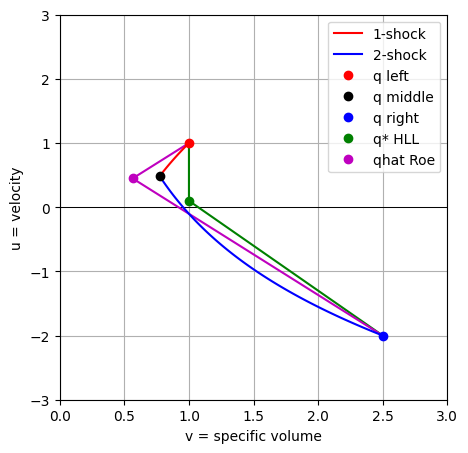

In [12]:
Image('isothermal_HLL_Roe.png', width=400)

**Solution 8:**

In [13]:
def Rsolver_HLL(vl,ul,vr,ur,a):
    S1 = min(s1(vl,vl,ul,a),s1(vr,vr,ul,a))
    S2 = max(s2(vl,vl,ul,a),s2(vr,vr,ul,a))
    
    vstar = (-ur+ul-S2*vr+S1*vl)/(S1-S2)
    ustar = (a**2/vr-a**2/vl-S2*ur+S1*ul)/(S1-S2)
             
    return vstar, ustar

In [14]:
def Rsolver_Roe(vl,ul,vr,ur,a):
    if (vr == vl):
        Ahat = [[0,-1],[-(a/vr)**2,0]] #just the derivative of p(v) when Delta v is zero
    else:
        Ahat = [[0,-1],[(a**2/vr-a**2/vl)/(vr-vl),0]]
        
    eigval, eigvec = eig(Ahat) 
    S1 = min(eigval)
    S2 = max(eigval)
    
    vhat = (-ur+ul-S2*vr+S1*vl)/(S1-S2)
    uhat = (a**2/vr-a**2/vl-S2*ur+S1*ul)/(S1-S2)
    
    return vhat, uhat

In [15]:
def plot_Rsoln_HLL_Roe(vl,ul,vr,ur,a):
    plot_Rsoln_sample(vl,ul,vr,ur,a)
    
    vHLL, uHLL = Rsolver_HLL(vl,ul,vr,ur,a)
    plot([vl,vHLL,vr],[ul,uHLL,ur], 'g',zorder = 1)
    plot(vHLL,uHLL,'go', label='q* HLL')
    text(.1,-2.4, '$v^*$ = %.5f, $u^*$ = %.5f' % (vHLL,uHLL), backgroundcolor='w')
    
    vRoe, uRoe = Rsolver_Roe(vl,ul,vr,ur,a)
    plot([vl,vRoe,vr],[ul,uRoe,ur], 'm',zorder = 2)
    plot(vRoe,uRoe,'mo', label='qhat Roe')
    text(.1,-2.8, 'vhat = %.5f, uhat = %.5f' % (vRoe,uRoe), backgroundcolor='w')
    
    legend()

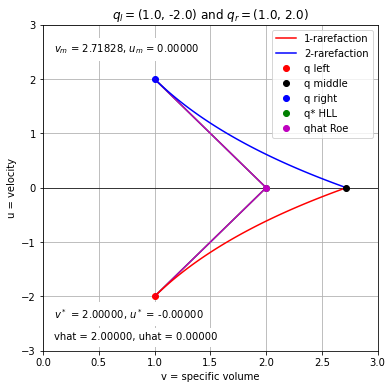

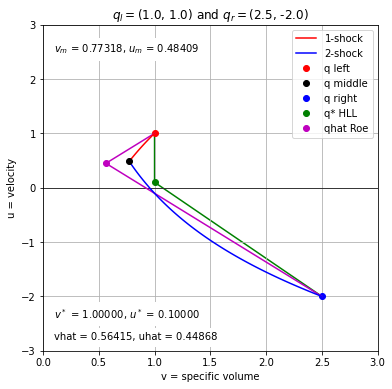

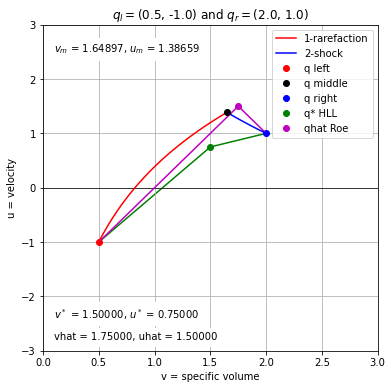

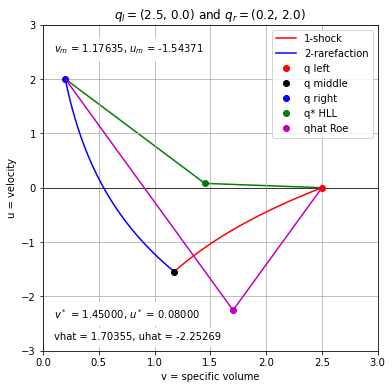

In [16]:
for index1 in range(len(qls)):
    ql = qls[index1]
    qr = qrs[index1]
    plot_Rsoln_HLL_Roe(ql[0],ql[1],qr[0],qr[1],a)
    show()